In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('dbscan.csv')
df.head()

,cluster,pt,x,y,num_neighbors,neighbors
0,NaN,0,51.418089,13.593610,2,"0,27"
1,NaN,1,39.132318,-4.419204,3,"1,40,75"
2,NaN,2,47.807515,-25.822561,1,2
3,NaN,3,27.699703,53.434193,1,3
4,NaN,4,39.860995,5.676871,3,"4,56,75"


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cluster        0 non-null      float64
 1   pt             80 non-null     int64  
 2   x              80 non-null     float64
 3   y              80 non-null     float64
 4   num_neighbors  80 non-null     int64  
 5   neighbors      80 non-null     object 
dtypes: float64(3), int64(2), object(1)
memory usage: 3.9+ KB


In [40]:
df['cluster'] = df['cluster'].fillna(0)

In [41]:
''' Given a single point from the dataframe, this function will traverse all the neigbhours 
 of the given node (until it cannot find new unique neigbhours). '''
 
def dfs(df, node_id, visited, current_cluster):
    if visited[node_id] == 1:
        return df

    df.at[node_id, 'cluster'] = current_cluster
    neigbhours = [int(i) for i in df['neighbors'][node_id].split(',')]
    visited[node_id] = 1

    for neigbhour in neigbhours:
        df = dfs(df, neigbhour, visited, current_cluster)
    
    return df

In [42]:
df1 = df.copy()

In [45]:
''' This logic is for iterating through each data point from the dataframe. This consists of following conditions:
    1. Check if a data point is already assigned to a cluster. If yes dont traverse that point (dfs), else traverse it.
    2. Check if a data point is a core point (number of neigbhours > minpts), if yes directly traverse it.
    3. If the point is not assigned to the cluster and it is not a core point, then it will be border point or an outlier. For
       this I am checking if a point is a border point by iterating it's neigbhours and checking if they are core points (if number
        of neigbhours of the neigbhour of border point > minpts, then we can say the current point is the border point)
'''
n = df.shape[0]
curr_cluster = 1 # counter to assign new cluster (cannot take zero as it is reserved for outlier)

# Loop to iterate through each point dataframe
for pt in range(n):
    curr_pt = df1.iloc[pt, 1]

    # Condition to check if the data point is already assigned to a cluster
    if  df1.at[curr_pt, 'cluster'] != 0:
        continue
    
    # Condition to check core data point, if it is just traverse it using dfs
    if df1.at[curr_pt, 'num_neighbors'] >= 3:
        df1 = dfs(df1.copy(), curr_pt, np.array([0]*80), curr_cluster)
        curr_cluster+=1 # incrementing to the new cluster as current one is already assigned in the dfs
    # This else is to check if a point is border point
    else:
        neigbhours = [int(i) for i in df1['neighbors'][curr_pt].split(',')] # Take the neigbhours of the border point

        # Iterate over the neigbhours and check if they have at 3 (minpts) neigbhours, if yes it is border point.
        for neigbhour in neigbhours:
            # Condition to check neigbhour core point
            if df1.at[neigbhour, 'num_neighbors'] >= 3:
                df1 = dfs(df1.copy(), curr_pt, np.array([0]*80), curr_cluster)
                curr_cluster += 1 

#At the end outlier will have 0 values as intialized as they could'nt be reached from any point using dfs. 

In [46]:
df1['cluster'].value_counts()

cluster
2.0    43
0.0    26
1.0     8
3.0     3
Name: count, dtype: int64

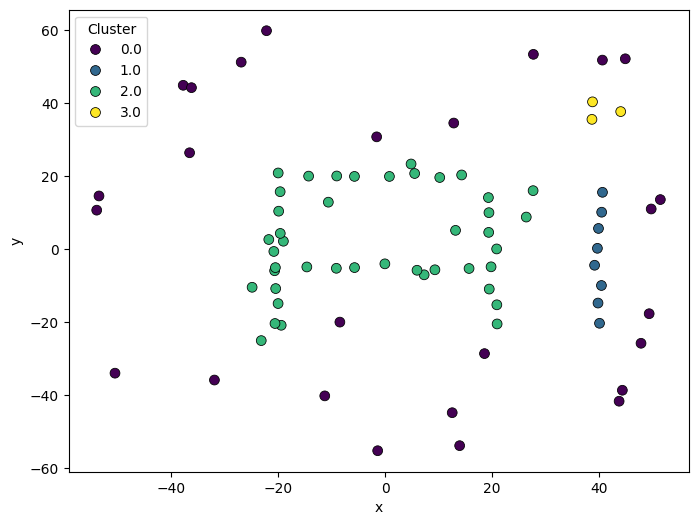

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.scatterplot(x=df1['x'], y=df1['y'], hue=df1['cluster'], palette='viridis', s=50, edgecolor='black')

plt.legend(title="Cluster")

